<a href="https://colab.research.google.com/github/sallmamostaffa/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("/content/Customer Segmentation.csv")
data.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10695 non-null  int64  
 1   ID               10695 non-null  int64  
 2   Gender           10695 non-null  object 
 3   Ever_Married     10505 non-null  object 
 4   Age              10695 non-null  int64  
 5   Graduated        10593 non-null  object 
 6   Profession       10533 non-null  object 
 7   Work_Experience  9597 non-null   float64
 8   Spending_Score   10695 non-null  object 
 9   Family_Size      10247 non-null  float64
 10  Var_1            10587 non-null  object 
 11  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB


In [ ]:
data.describe()

,Unnamed: 0,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,10695.000000,9597.000000,10247.000000
mean,5347.000000,463468.088640,43.511828,2.619777,2.844052
std,3087.524899,2600.966411,16.774158,3.390790,1.536427
min,0.000000,458982.000000,18.000000,0.000000,1.000000
25%,2673.500000,461220.500000,30.000000,0.000000,2.000000
50%,5347.000000,463451.000000,41.000000,1.000000,3.000000
75%,8020.500000,465733.500000,53.000000,4.000000,4.000000
max,10694.000000,467974.000000,89.000000,14.000000,9.000000


In [ ]:
data.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}: {data[col].unique()}')

Unique values in Gender: ['Female' 'Male']
Unique values in Ever_Married: ['No' 'Yes' nan]
Unique values in Graduated: ['Yes' 'No' nan]
Unique values in Profession: ['Healthcare' 'Artist' 'Lawyer' 'Entertainment' 'Engineer' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Unique values in Spending_Score: ['Low' 'High' 'Average']
Unique values in Var_1: ['Cat_6' 'Cat_4' 'Cat_3' 'Cat_2' 'Cat_7' 'Cat_1' 'Cat_5' nan]
Unique values in Segmentation: ['D' 'A' 'C' 'B']


In [ ]:
print(data.isnull().sum())

Unnamed: 0            0
ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64


Text(0, 0.5, 'Counts')

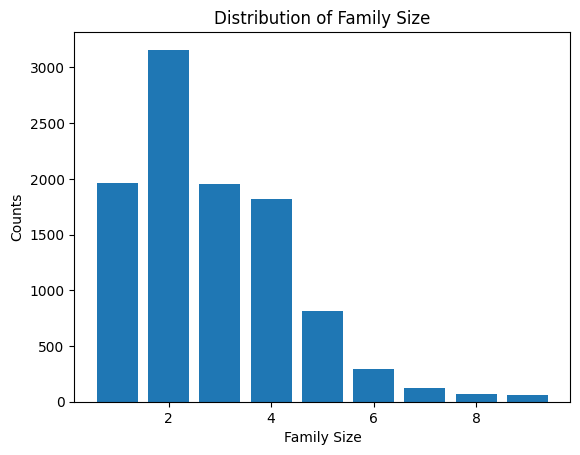

In [ ]:
plt.bar(data[  'Family_Size'].value_counts().index, data['Family_Size'].value_counts().values)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

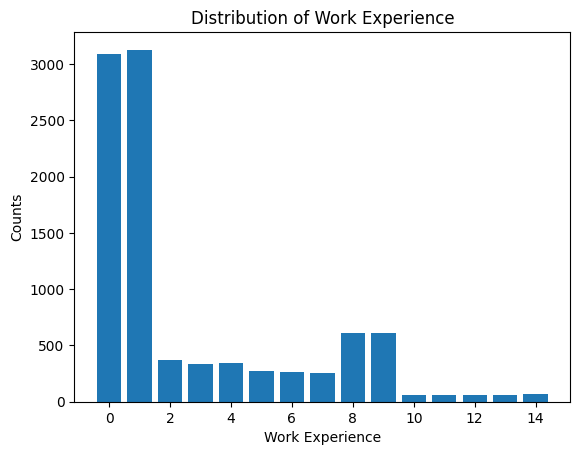

In [ ]:
plt.bar(data['Work_Experience'].value_counts().index, data['Work_Experience'].value_counts().values)
plt.title('Distribution of Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

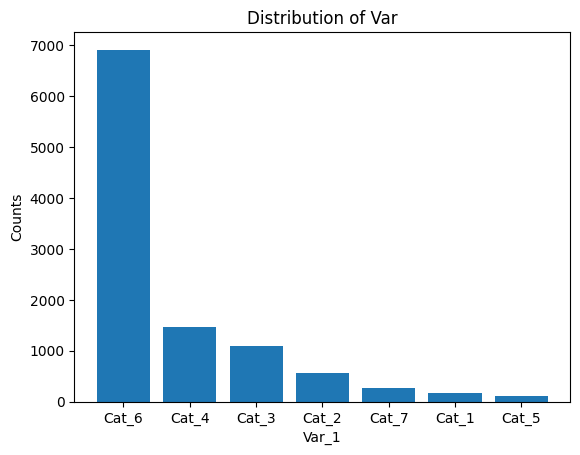

In [ ]:
plt.bar(data['Var_1'].value_counts().index, data['Var_1'].value_counts().values)
plt.title('Distribution of Var')
plt.xlabel('Var_1')
plt.ylabel('Counts')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Artist'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Doctor'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Executive'),
  Text(7, 0, 'Marketing'),
  Text(8, 0, 'Homemaker')])

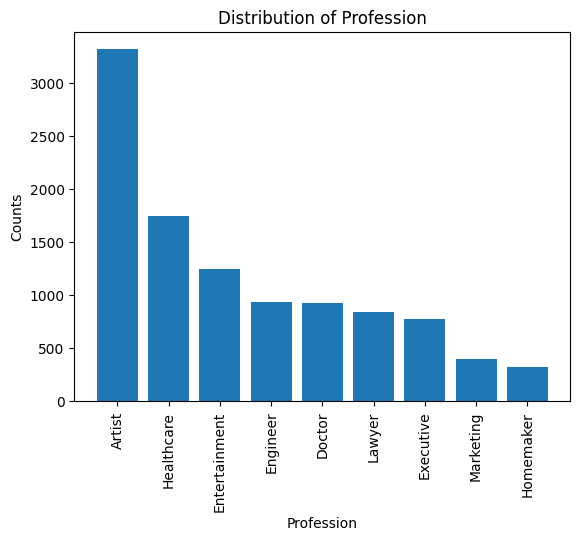

In [ ]:
plt.bar(data['Profession'].value_counts().index, data
        ['Profession'].value_counts().values)
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Counts')

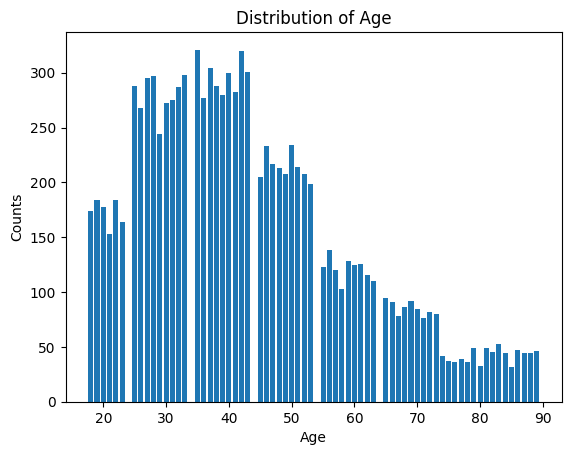

In [ ]:
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts().values)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Counts')

In [ ]:
data = data.drop(['Unnamed: 0', 'ID'], axis=1)

In [ ]:
data['Work_Experience'].fillna(data['Work_Experience'].mean(), inplace=True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
print(data.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [ ]:
data = data.drop('Segmentation', axis=1)

In [ ]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
print(data.head())

     Gender  Ever_Married       Age  Graduated  Profession  Work_Experience  \
0 -1.108062     -1.206889 -0.692358   0.769188    0.882823         1.982350   
1 -1.108062     -1.206889  0.745581   0.769188   -1.083752        -0.810168   
2  0.902476      0.828576  1.883950  -1.300072    1.669453        -0.499888   
3  0.902476      0.828576 -0.272959  -1.300072    0.096193         1.982350   
4  0.902476     -1.206889 -1.291499  -1.300072    0.882823         1.982350   

   Spending_Score  Family_Size     Var_1  
0        0.762016     0.102257  0.590718  
1        0.762016    -1.200653  0.590718  
2        0.762016    -1.200653 -0.829508  
3        0.762016    -0.549198 -1.539620  
4        0.762016     1.405167 -0.829508  


In [ ]:
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,-1.108062,-1.206889,-0.692358,0.769188,0.882823,1.982350,0.762016,0.102257,0.590718
1,-1.108062,-1.206889,0.745581,0.769188,-1.083752,-0.810168,0.762016,-1.200653,0.590718
2,0.902476,0.828576,1.883950,-1.300072,1.669453,-0.499888,0.762016,-1.200653,-0.829508
3,0.902476,0.828576,-0.272959,-1.300072,0.096193,1.982350,0.762016,-0.549198,-1.539620
4,0.902476,-1.206889,-1.291499,-1.300072,0.882823,1.982350,0.762016,1.405167,-0.829508


In [ ]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

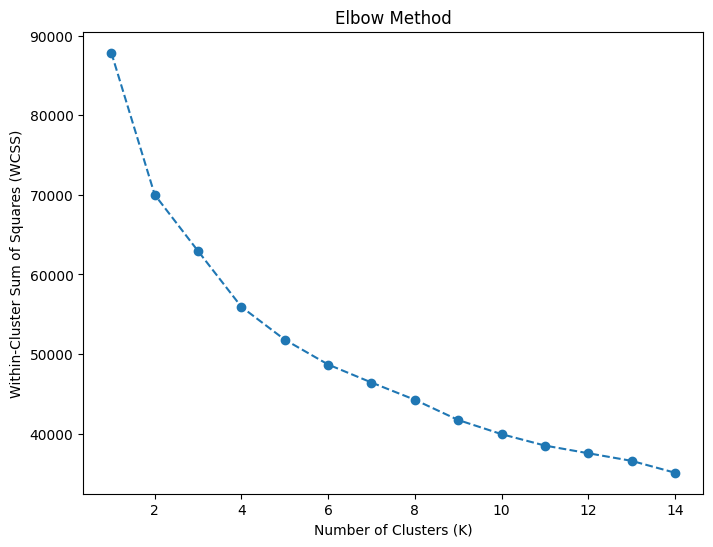

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [ ]:
X = data.iloc[:,[2,5]].values

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 3 ... 1 3 0]


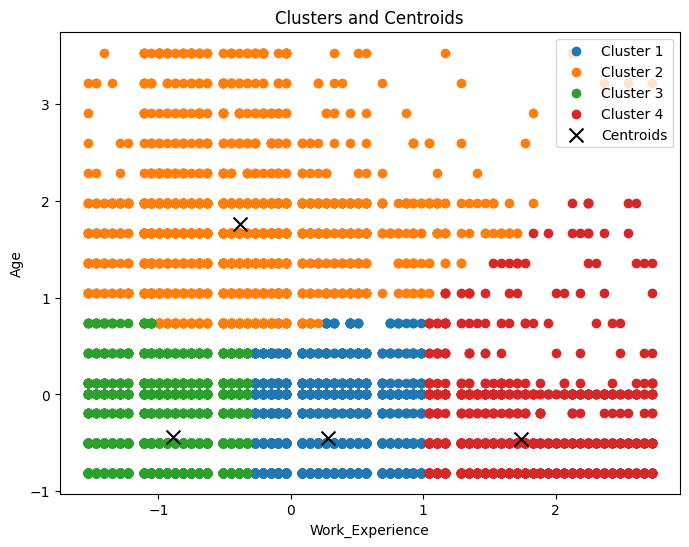

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(4):  # Assuming 4 clusters
    plt.scatter(X[Y == i, 0], X[Y == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('Work_Experience')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
data['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_means = data.groupby('Cluster').mean()
print("Mean values per cluster:")
print(cluster_means)

Mean values per cluster:
           Gender  Ever_Married       Age  Graduated  Profession  \
Cluster                                                            
0        0.032697      0.412383  0.279444   0.304591   -0.434045   
1       -0.106830     -0.189156 -0.383644   0.082551   -0.094146   
2        0.010248     -0.640157 -0.891401  -0.379818    0.195363   
3        0.051617      0.728684  1.738880   0.068884    0.567970   

         Work_Experience  Spending_Score  Family_Size     Var_1  
Cluster                                                          
0              -0.452584       -0.392599    -0.033088  0.025335  
1               1.760856        0.117035    -0.123725  0.036744  
2              -0.446254        0.393398     0.327800 -0.193623  
3              -0.460190       -0.178969    -0.438338  0.293819  


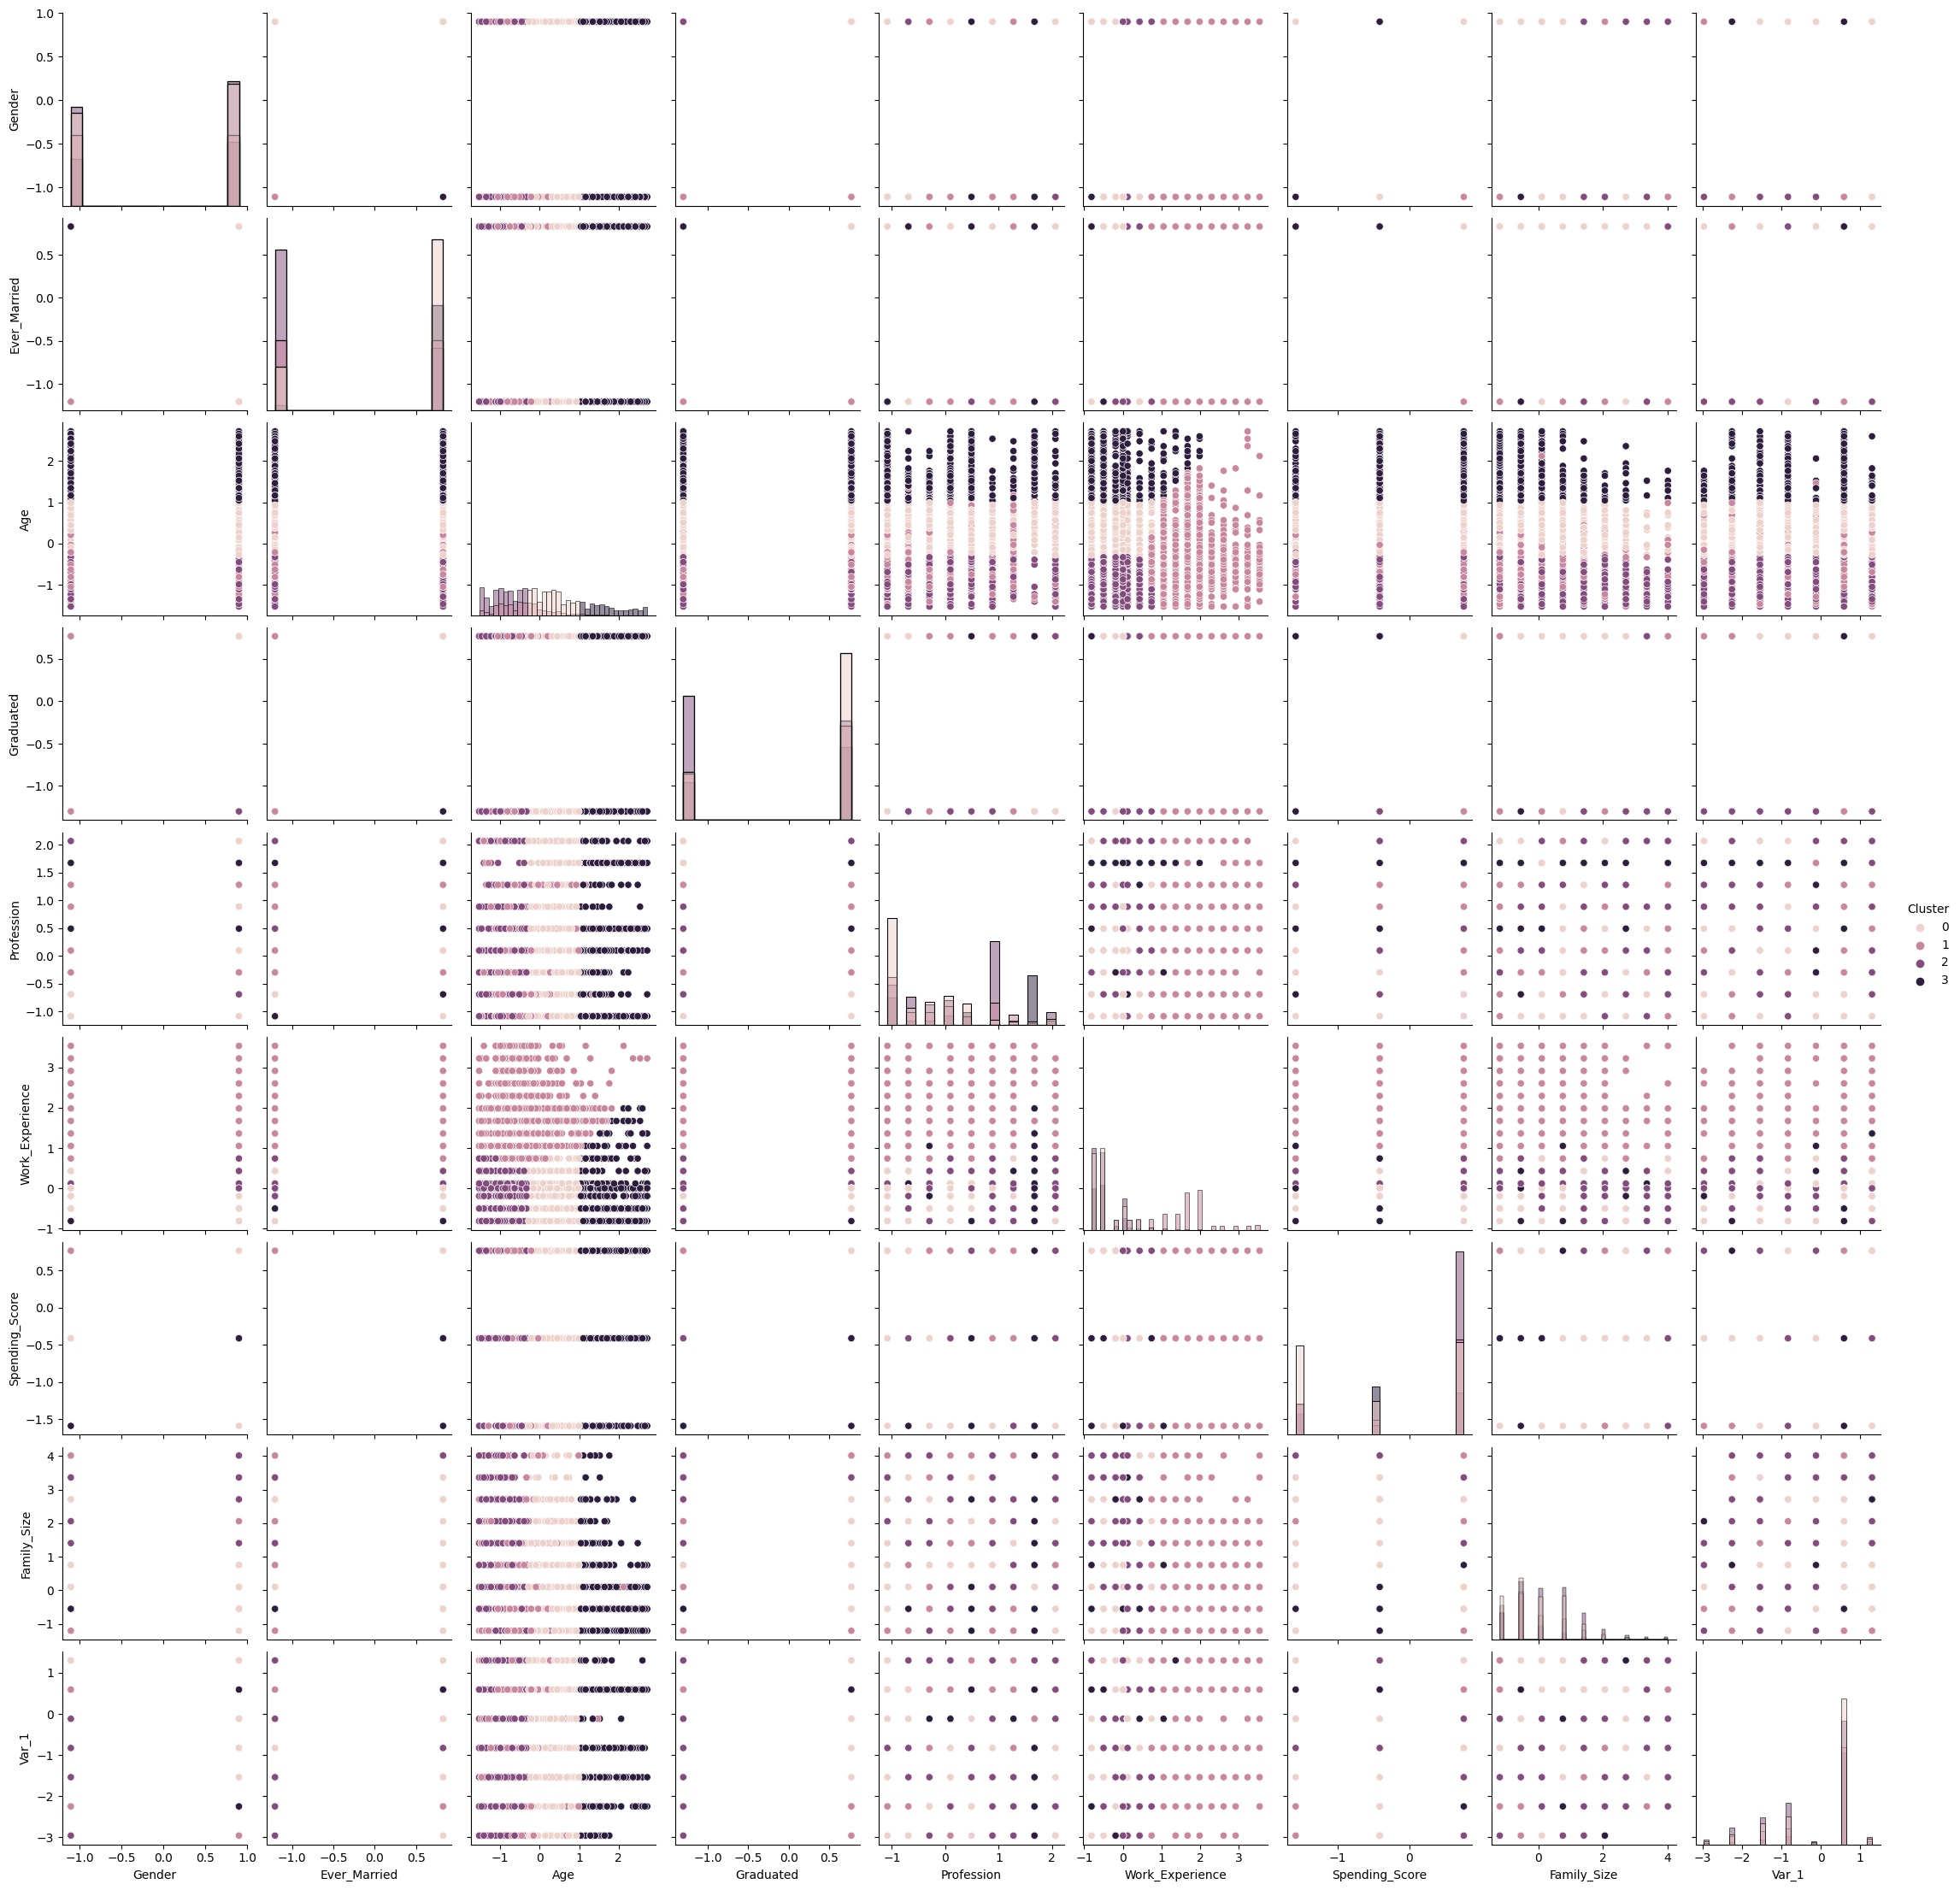

In [ ]:
sns.pairplot(data, hue='Cluster', diag_kind='hist')
plt.show()

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Cluster distribution for {col}:")
    print(data.groupby(['Cluster', col]).size())

In [ ]:
cluster_profession = data.groupby(['Cluster', 'Profession']).size().unstack().fillna(0)
print("Distribution of Professions within Clusters:")
print(cluster_profession)

Distribution of Professions within Clusters:
Profession  -1.083752  -0.690437  -0.297122   0.096193   0.489508   0.882823  \
Cluster                                                                        
0                1506        237        329        412        303         73   
1                 682        180        185        267        124        314   
2                 569        399        289        350        119       1182   
3                 383         56         63        128        182         12   

Profession   1.276138   1.669453   2.062768  
Cluster                                      
0                  47         45         90  
1                 151         23         66  
2                  66          6        177  
3                  12        701         32  


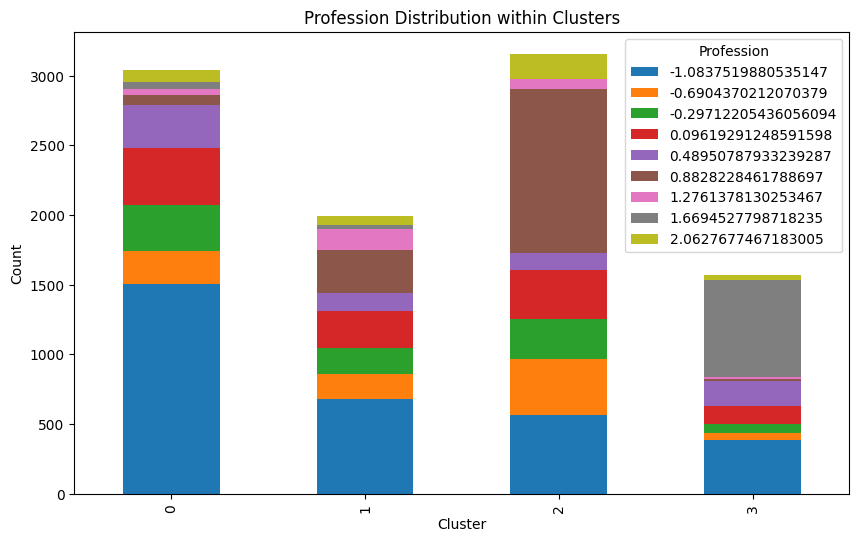

In [ ]:
cluster_profession.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Profession Distribution within Clusters')
plt.legend(title='Profession', bbox_to_anchor=(1, 1))
plt.show()